<font color="blue">Привет. Давай смотреть как справился с проектом

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
models = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')
festivals = pd.read_csv('/datasets/query_last.csv')

In [3]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
print(models.sort_values('flights_amount', ascending=False))

                 model  flights_amount
6   Cessna 208 Caravan            4557
5   Bombardier CRJ-200            4446
7  Sukhoi SuperJet-100            4185
1      Airbus A321-200             960
2       Boeing 737-300             630
0      Airbus A319-100             607
3       Boeing 767-300             600
4       Boeing 777-300             300


Ого, всего 8 строк :)

In [5]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [6]:
cities.duplicated(subset=['city']).sum()

0

Дубликатов по городам нет

In [7]:
print(cities)

               city  average_flights
0            Абакан         3.870968
1           Анадырь         1.000000
2             Анапа         2.161290
3       Архангельск         5.354839
4         Астрахань         2.451613
..              ...              ...
96             Чита         1.580645
97           Элиста         4.870968
98   Южно-Сахалинск         4.290323
99           Якутск         2.741935
100       Ярославль         1.322581

[101 rows x 2 columns]


#### Пропусков в данных нет, типы данных используются верные. Дубликатов нет
#### Выберем ТОП-10 городов по количеству полётов

In [8]:
cities_top10 = cities.sort_values(by='average_flights', ascending=False).reset_index(drop=True).head(10)
cities_top10

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


Построим графики

[Text(0, 0.5, ''), Text(0.5, 0, 'Кол-во рейсов')]

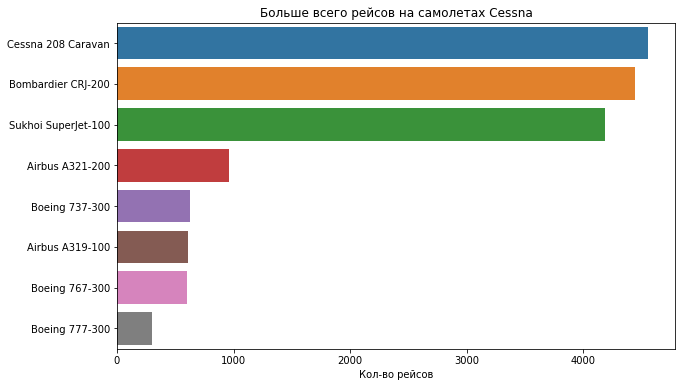

In [9]:
f, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='flights_amount', y='model', data=models.sort_values('flights_amount', ascending=False)).set_title('Больше всего рейсов на самолетах Cessna')
ax.set(ylabel="", xlabel="Кол-во рейсов")

* На самолетах Cessna, Bombardier и Sukhoi больше 4000 рейсов. На остальных моделях самолетов рейсов меньше 1500
* Чем больше самолет - тем меньше рейсов. Скорее всего больших самолётов в принципе меньше, так как они дорогие и востребованы меньше

[Text(0, 0.5, ''), Text(0.5, 0, 'Кол-во рейсов')]

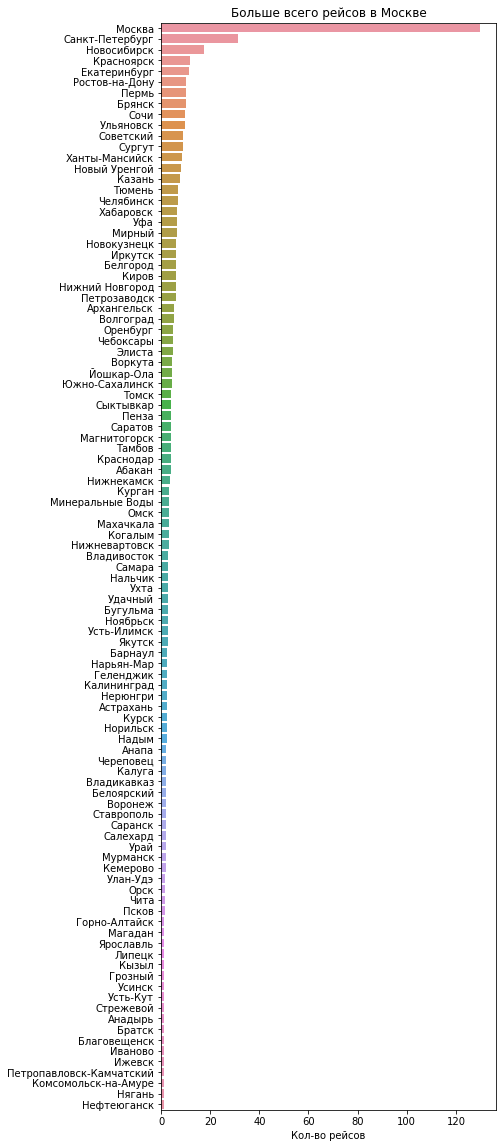

In [10]:
f, ax = plt.subplots(figsize=(6, 20))
sns.barplot(x='average_flights', y='city', data=cities.sort_values('average_flights', ascending=False)).set_title('Больше всего рейсов в Москве')
ax.set(ylabel="", xlabel="Кол-во рейсов")

* В Москве больше всего рейсов(значительно!)
* Нижний-Новгород 5ый по населению, а по рейсам только 25ый
* Много рейсов в нефтяные регионы

[Text(0, 0.5, ''), Text(0.5, 0, 'Кол-во рейсов')]

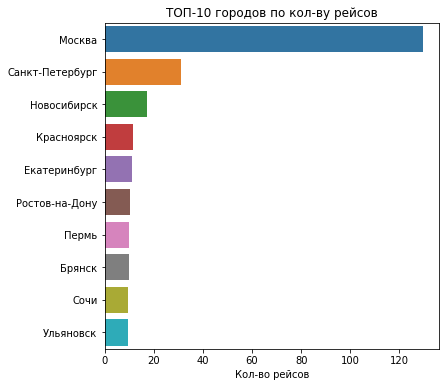

In [11]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x='average_flights', y='city', data=cities_top10.sort_values('average_flights', ascending=False)).set_title('ТОП-10 городов по кол-ву рейсов')
ax.set(ylabel="", xlabel="Кол-во рейсов")

* Cтранно что в ТОП-10 попали Брянск и Ульяновск

# 2. Проверка гипотезы

In [12]:
festivals

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Попробуем сформулировать гипотезы. В задании речь идёт о сравнении среднего спроса, но кажется логичным проверить что спрос во время фестивалей увеличивается

Нулевая гипотеза: Средний спрос на билеты во время фестивалей равен среднему спросу в обычное время

Альтернативная гипотеза: Средние спрос на билеты во время фестивалей больше спроса в обычное время

In [13]:
feastivals_true_array = festivals[festivals['festival_week'].notnull()]['ticket_amount'].values
print(feastivals_true_array)

feastivals_false_array = festivals[festivals['festival_week'].isnull()]['ticket_amount'].values
print(feastivals_false_array)

[43568 51034 51386]
[51675 51378 51492 51360 51670 51518 51623]


Мы имеем дело с проверкой одностронней гипотезы, воспользуемся T-тестом. Пороговое значение установим равным 0.05<br>
Так как тест односторонний, то уменьшим p-value в два раза

In [14]:
feastivals_false_array_mean = np.mean(feastivals_false_array)
print('Среднее для безфестивальной выборки: {:.2f}'.format(feastivals_false_array_mean))

Среднее для безфестивальной выборки: 51530.86


In [15]:
alpha = .05

results = st.ttest_1samp(
    feastivals_true_array, 
    feastivals_false_array_mean)
print('p-значение: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (feastivals_true_array.mean() > feastivals_false_array_mean):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.18871776675760188
Не получилось отвергнуть нулевую гипотезу


<font color="blue">Не смотря на то что результат верный, но условия очень и очень странные. Почему ты результат теста делишь на 2? Откуда второе условие? Давай переделаем к каноническому виду.

### Тест показал что мы не можем отвергнуть H0, значит мы не можем утверждать, что наличие фестиваля влияет на количество проданных билетов

Я пытался повторить вот этот сценарий https://praktikum.yandex.ru/learn/data-scientist/courses/d5780d7e-c8a3-4640-b860-72f9058cc556/sprints/845/topics/6a15eb98-135d-45b3-afa2-36b531bab06e/lessons/c489da95-db37-4f2d-af40-b35edd1e334f/

<font color="blue">Надо было указать что речь про односторонюю гиптозеу. В этом случае она ну не очень корректна. Хотя я примерно понял твой замысел.

### Канонический вариант

Нулевая гипотеза: Средний спрос на билеты во время фестивалей равен среднему спросу в обычное время

Альтернативная гипотеза: Средние спрос на билеты во время фестивалей не равен спросу в обычное время

Т.к. выборки разных размеров установим параметр equal_var = False чтобы использовать Welch's t-test

In [20]:
alpha = .05
results = st.ttest_ind(feastivals_true_array, feastivals_false_array, equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.377432493172683


In [21]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Вывод тот же!

<font color="blue">Принято

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод